In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm #stat models (regression)
import statsmodels.formula.api as smf
from patsy.contrasts import Sum
import matplotlib.pyplot as plt #2d plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
%config IPCompleter.greedy=True #tabbing for autocomplete
# prepare for Python version 3x features and functions
from __future__ import division, print_function

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from patsy.contrasts import Sum


In [31]:
conjoint_data_frame = pd.read_csv('C:/Users/jdine/Desktop/SYracuse/Term 5 - Current/Advanced Info Analytics- IST 718/EBook + Data/Chapter_3/mobile_services_ranking.csv')
conjoint_data_frame.head(5)

main_effects_model = 'ranking ~ C(brand, Sum) + C(startup, Sum) + C(monthly, Sum) + C(service, Sum) \
+ C(retail, Sum) + C(apple, Sum) + C(samsung, Sum) + C(google, Sum)'

main_effects_model_fit = \
    smf.ols(main_effects_model, data= conjoint_data_frame).fit()
print(main_effects_model_fit.summary())

# set up sum contrasts for effects coding as needed for conjoint analysis
# using C(effect, Sum) notation within main effects model specification
main_effects_model = 'ranking ~ C(brand, Sum) + C(startup, Sum) +  \
    C(monthly, Sum) + C(service, Sum) + C(retail, Sum) + C(apple, Sum) + \
    C(samsung, Sum) + C(google, Sum)'

# fit linear regression model using main effects only (no interaction terms)
main_effects_model_fit = \
    smf.ols(main_effects_model, data = conjoint_data_frame).fit()
print(main_effects_model_fit.summary()) 

conjoint_attributes = ['brand', 'startup', 'monthly', 'service', \
    'retail', 'apple', 'samsung', 'google']

# build part-worth information one attribute at a time
level_name = []
part_worth = []
part_worth_range = []
end = 1  # initialize index for coefficient in params
for item in conjoint_attributes:
    nlevels = len(list(np.unique(conjoint_data_frame[item])))
    level_name.append(list(np.unique(conjoint_data_frame[item]))) 
    begin = end 
    end = begin + nlevels - 1
    new_part_worth = list(main_effects_model_fit.params[begin:end])
    new_part_worth.append((-1) * sum(new_part_worth))  
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))  
    part_worth.append(new_part_worth)   
    # end set to begin next iteration
    
# compute attribute relative importance values from ranges
attribute_importance = []
for item in part_worth_range:
    attribute_importance.append(round(100 * (item / sum(part_worth_range)),2))
    
# user-defined dictionary for printing descriptive attribute names     
effect_name_dict = {'brand' : 'Mobile Service Provider', \
    'startup' : 'Start-up Cost', 'monthly' : 'Monthly Cost', \
    'service' : 'Offers 4G Service', 'retail' : 'Has Nearby Retail Store', \
    'apple' : 'Sells Apple Products', 'samsung' : 'Sells Samsung Products', \
    'google' : 'Sells Google/Nexus Products'}  
 
# report conjoint measures to console 
index = 0  # initialize for use in for-loop
for item in conjoint_attributes:
    print('\nAttribute:', effect_name_dict[item])
    print('    Importance:', attribute_importance[index])
    print('    Level Part-Worths')
    for level in range(len(level_name[index])):
        print('       ',level_name[index][level], part_worth[index][level])       
    index = index + 1
    


                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Tue, 30 Jan 2018   Prob (F-statistic):             0.0794
Time:                        13:39:50   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

C:\Users\jdine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Tue, 30 Jan 2018   Prob (F-statistic):             0.0794
Time:                        13:59:25   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

C:\Users\jdine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


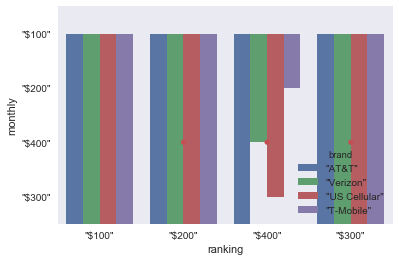

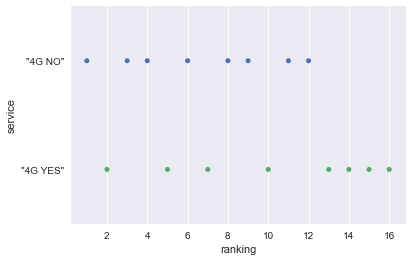

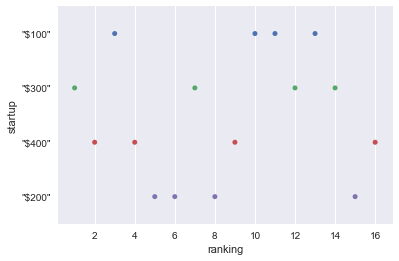

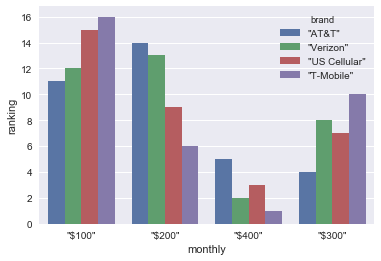

In [59]:

#build a model to show all relevant variables
my_model = str('ranking ~  brand + startup + monthly + service + retail + apple + samsung +google')

train_model_fit = smf.ols(my_model, data = conjoint_data_frame).fit()
print(train_model_fit.summary())
print(train_model_fit.params)



sns.stripplot(x= "ranking", y = "monthly", data= conjoint_data_frame)
plt.show()

sns.swarmplot(x="ranking", y="service", data= conjoint_data_frame)
plt.show()

sns.swarmplot(x="ranking", y="startup", data= conjoint_data_frame)
plt.show()

sns.barplot(x="monthly", y="ranking", hue="brand", data=conjoint_data_frame)
plt.show()
